# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

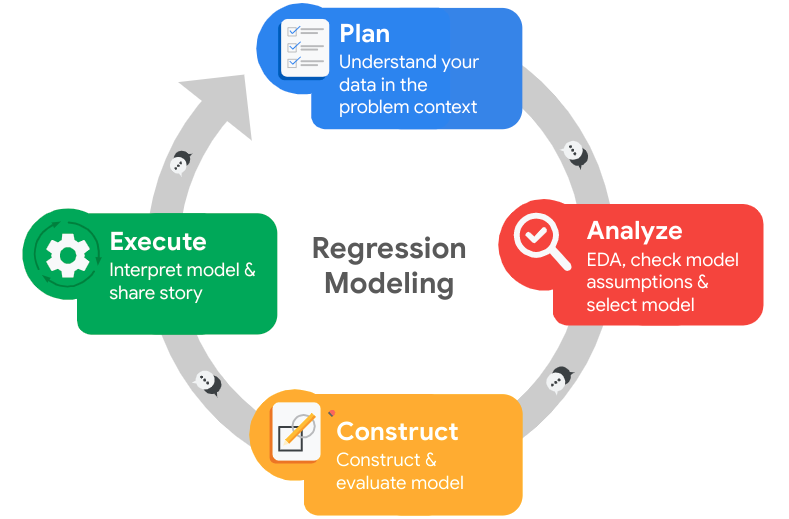



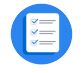

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




In [20]:
## Relevant Imports for now, will require more later

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
## Reading in Data

df0 = pd.read_csv("HR_capstone_dataset.csv")
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [22]:
## Exploring Data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [38]:
## Renaming Columns such that they are consistent

df1 = df0.rename(columns={'Work_accident':'work_accident','Department':'department','average_montly_hours':'average_monthly_hours'})

In [39]:
## Checking for null values

df1.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

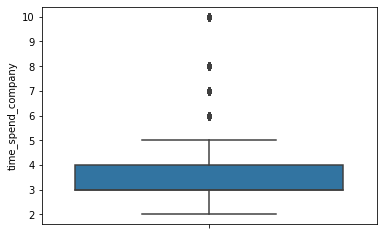

In [47]:
## Checking for outliers in time spent at the company

sns.boxplot(data = df1, y='time_spend_company')

In [49]:
## Getting rid of outliers
q1 = df1['time_spend_company'].quantile(0.25)
q3 = df1['time_spend_company'].quantile(0.75)

iqr = q3-q1
print('q1 = ',q1)
print('q3 = ',q3)
print('IQR = ',iqr)

q1 =  3.0
q3 =  4.0
IQR =  1.0


In [50]:
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr
print('Lower limit = ',lower_limit)
print('Upper limit = ',upper_limit)

Lower limit =  1.5
Upper limit =  5.5


In [52]:
## Removing outliers from data set as new data set

df2 = df1.drop(df1[(df1['time_spend_company'] < 1.5) | (df1['time_spend_company'] > 5.5)].index)

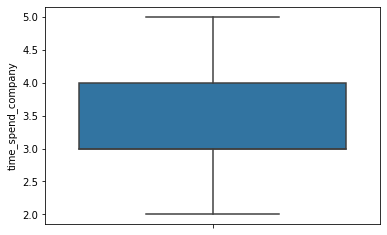

In [54]:
## Displaying Results

sns.boxplot(data = df2, y='time_spend_company')

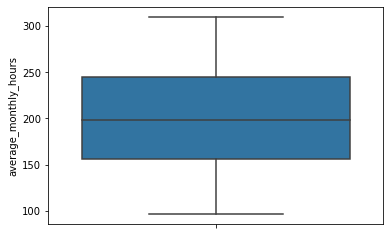

In [56]:
## Checking for outliers in average monthly hours

sns.boxplot(data = df2, y='average_monthly_hours')

### Data visualizations
Plotting relevant variables 

In [94]:
df2.reset_index(inplace=True,drop=True)
df2

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.11,0.88,7,272,4,0,1,0,sales,medium
2,0.72,0.87,5,223,5,0,1,0,sales,low
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
13712,0.40,0.57,2,151,3,0,1,0,support,low
13713,0.37,0.48,2,160,3,0,1,0,support,low
13714,0.37,0.53,2,143,3,0,1,0,support,low
13715,0.11,0.96,6,280,4,0,1,0,support,low


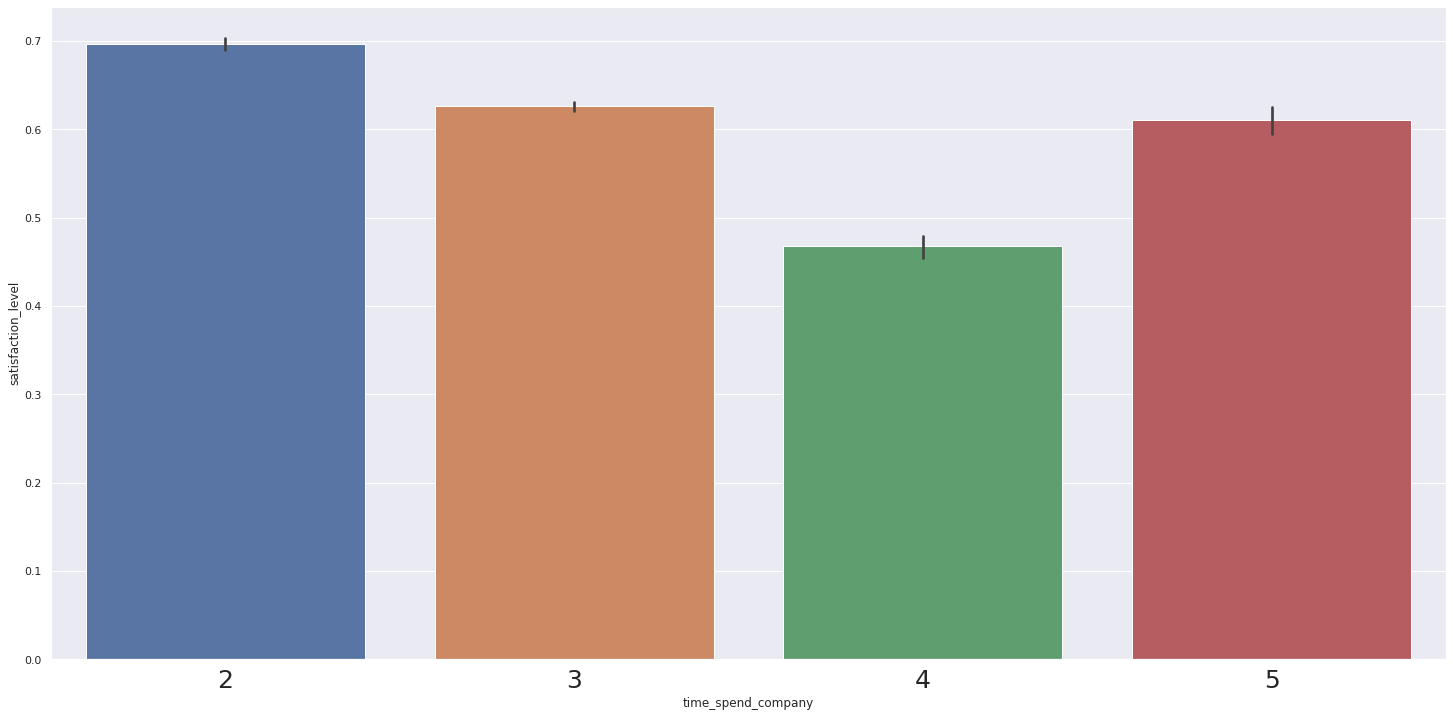

In [89]:
sns.barplot(data=df2, x='time_spend_company', y='satisfaction_level')
plt.xticks(rotation=0,fontsize=25)
sns.set(rc={'figure.figsize':(25,12)})

Satisfaction trends downward with time spend at company

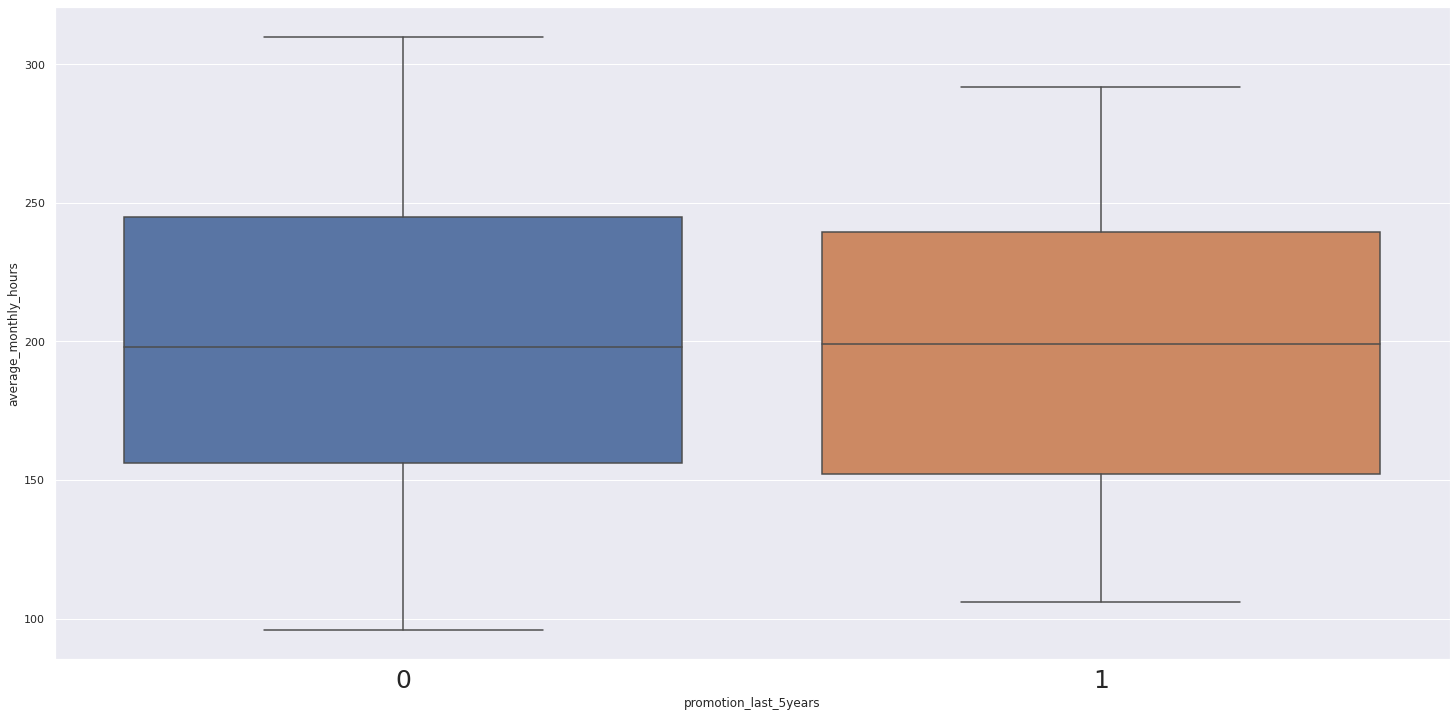

In [90]:
sns.boxplot(data=df2, x='promotion_last_5years', y='average_monthly_hours')
plt.xticks(rotation=0,fontsize=25)
sns.set(rc={'figure.figsize':(25,12)})

Average monthly hours is not strongly correlated to whether they've had a promotion in the last 5 years

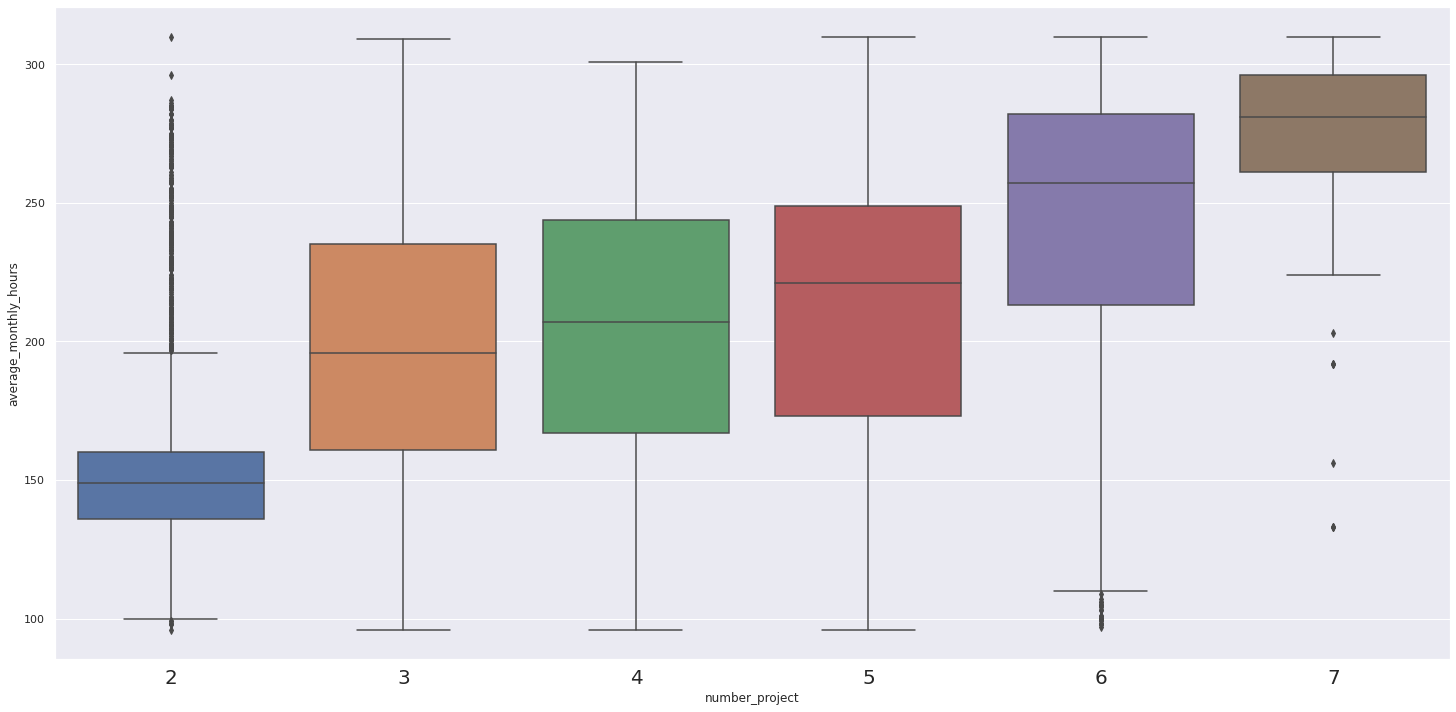

In [81]:
sns.boxplot(data=df2, x='number_project', y='average_monthly_hours')
plt.xticks(rotation=0,fontsize=20)
sns.set(rc={'figure.figsize':(25,12)})

The more projects an employee contributes to is a good indicator of how many hours they average per month

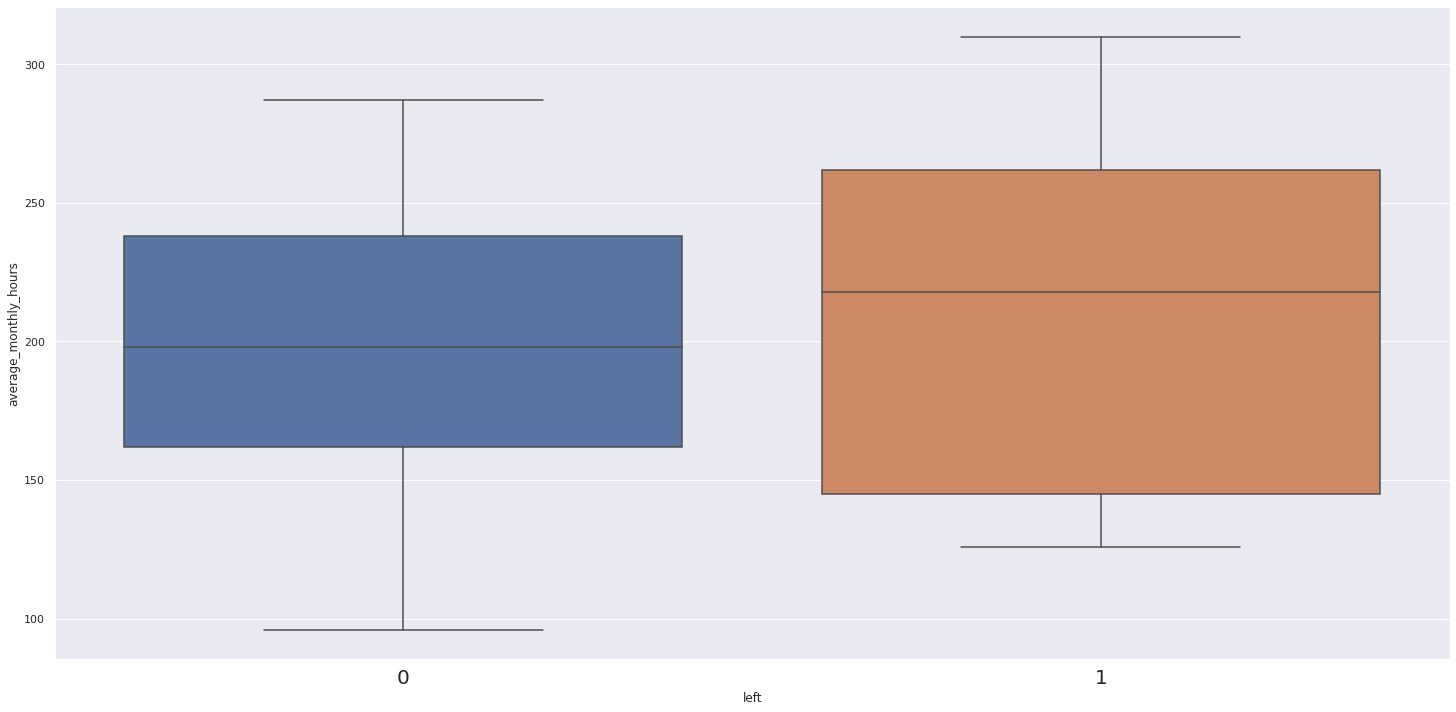

In [82]:
sns.boxplot(data=df2, x='left', y='average_monthly_hours')
plt.xticks(rotation=0,fontsize=20)
sns.set(rc={'figure.figsize':(25,12)})

The employees that were working the most hours per month on average are more likely to have left

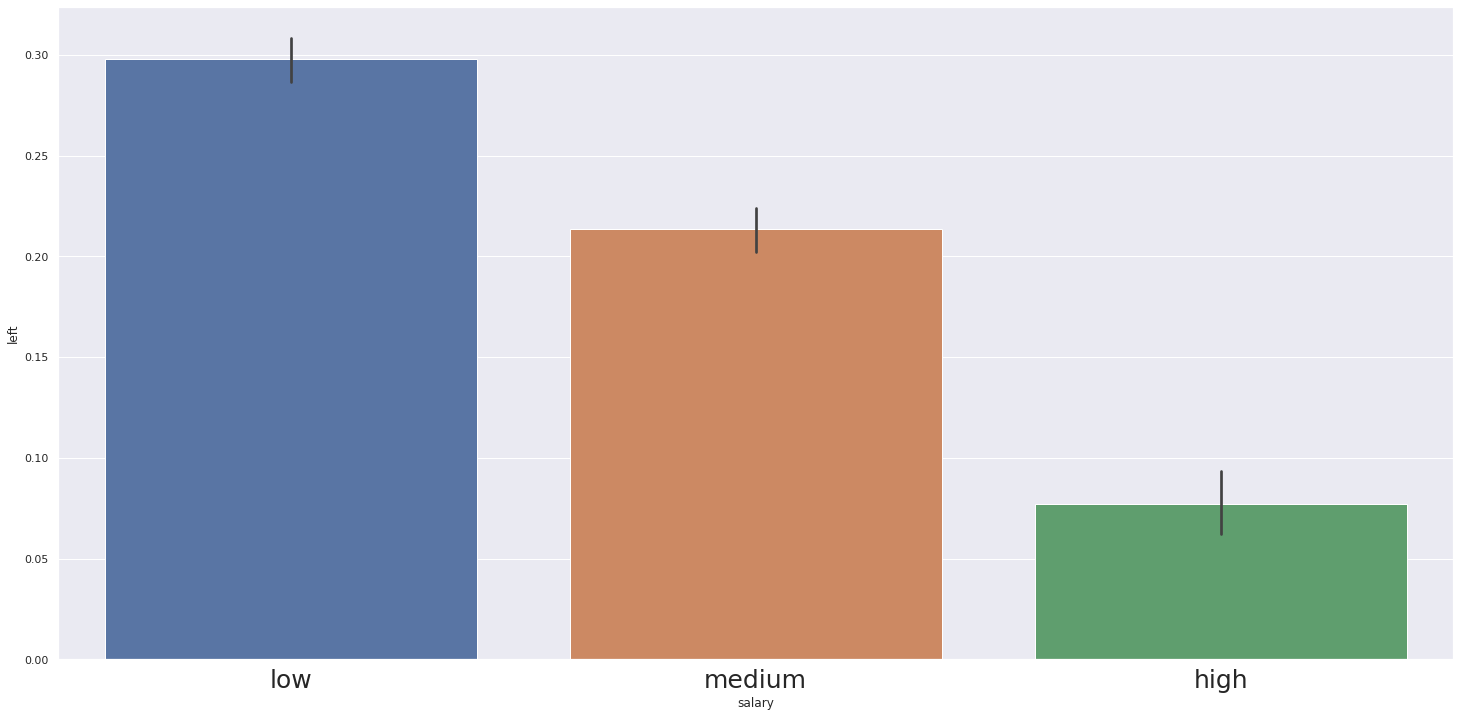

In [92]:
sns.barplot(data=df2, x='salary', y='left')
plt.xticks(rotation=0,fontsize=25)
sns.set(rc={'figure.figsize':(25,12)})

Less likely to leave with higher salary

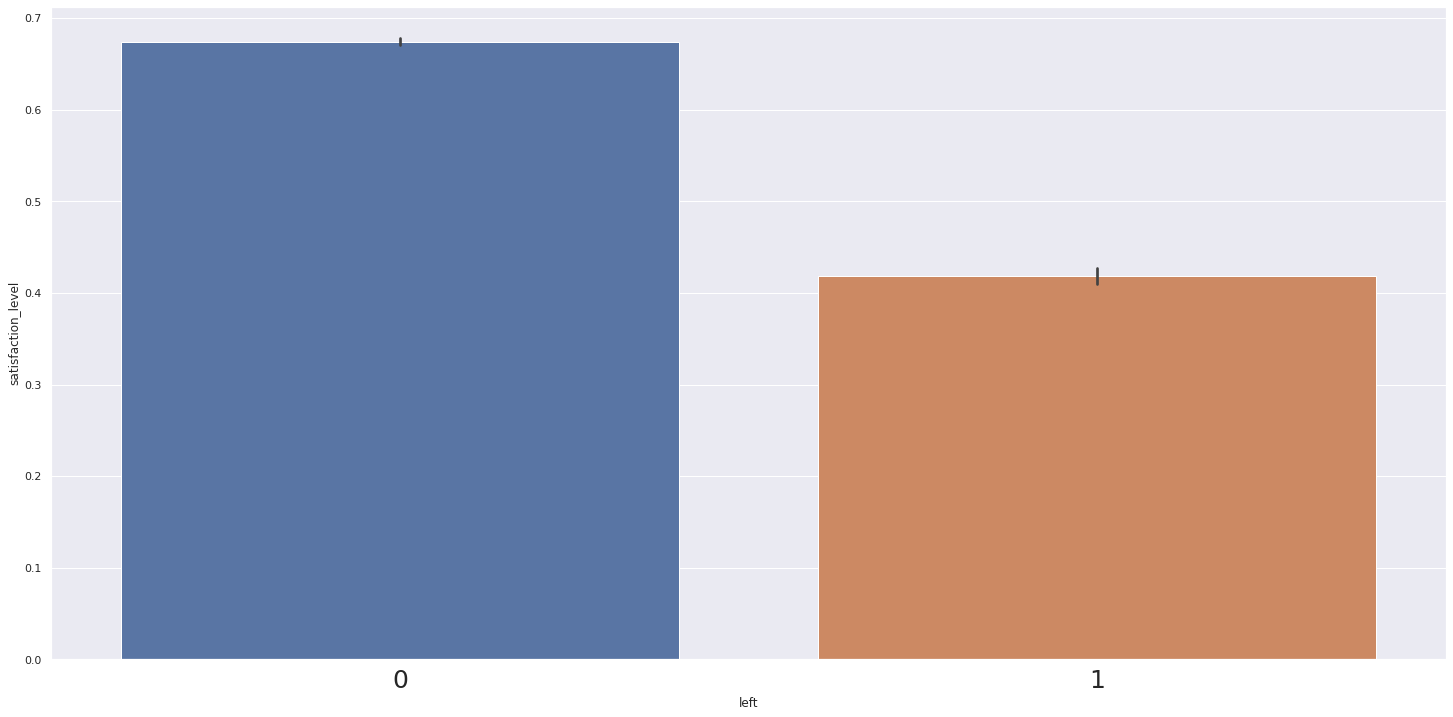

In [93]:
sns.barplot(data=df2, x='left', y='satisfaction_level')
plt.xticks(rotation=0,fontsize=25)
sns.set(rc={'figure.figsize':(25,12)})

Those that leave have a lower satisfaction level

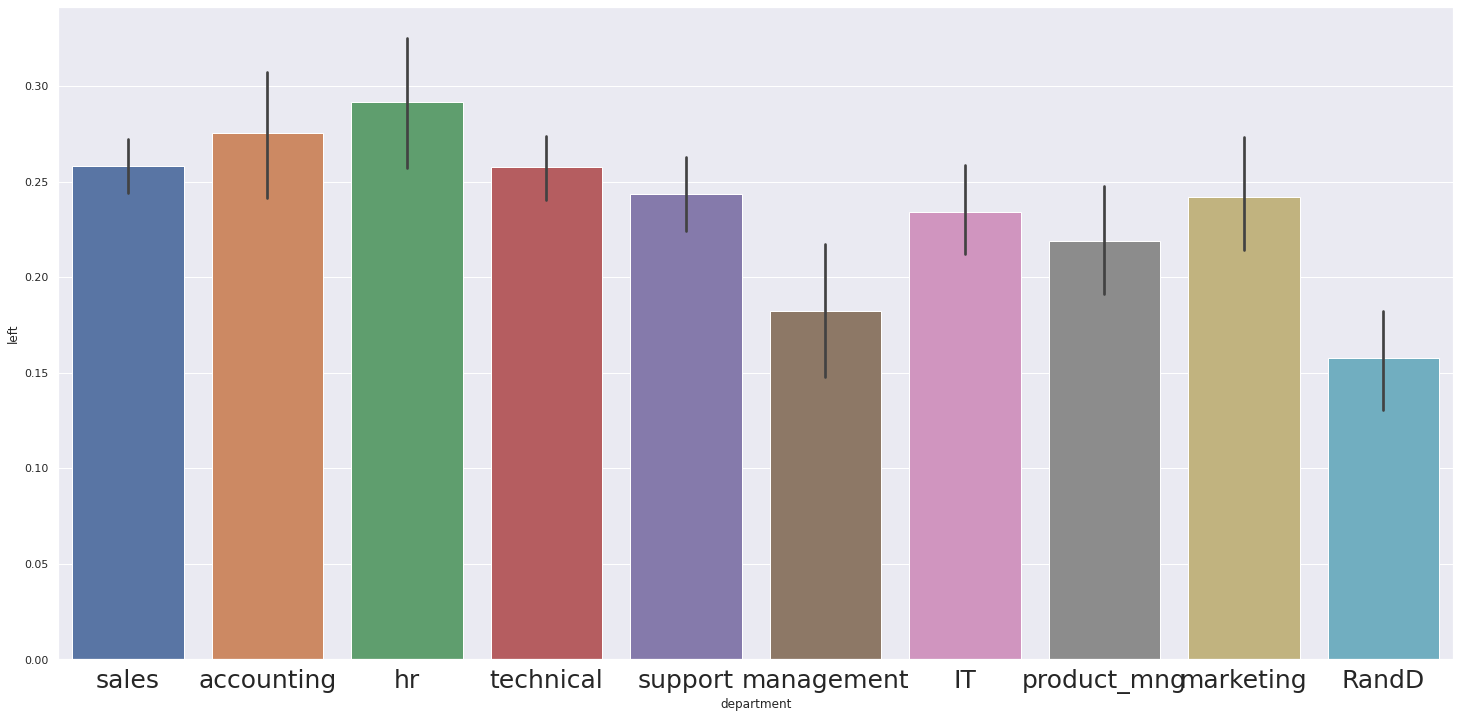

In [95]:
sns.barplot(data=df2, x='department', y='left')
plt.xticks(rotation=0,fontsize=25)
sns.set(rc={'figure.figsize':(25,12)})

In [111]:
## Validating barplot

sales = df2[df2['department'] == 'sales']
sales_left = sales.left.sum()
sales_emp = len(sales)
print(sales_left)
print(sales_emp)
percent = sales_left / sales_emp
print(percent)

966
3739
0.25835784969243114


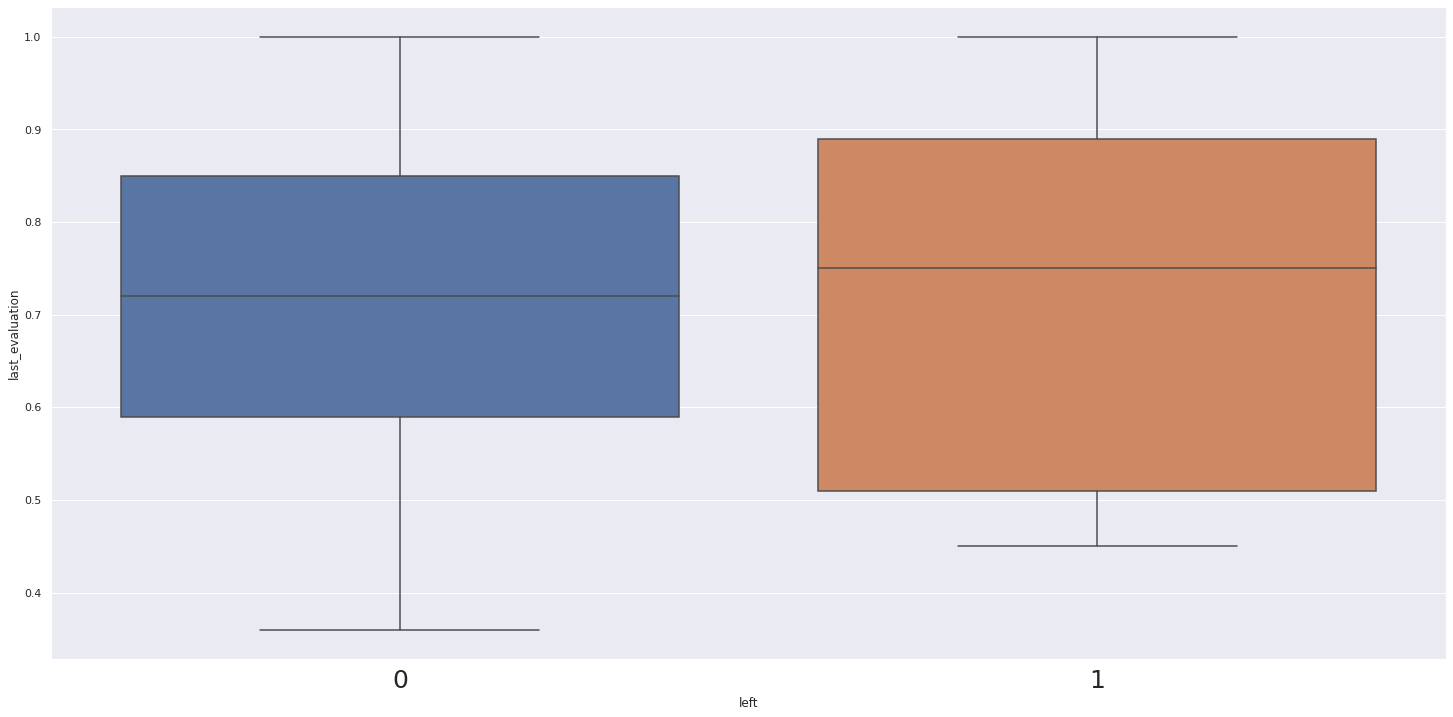

In [112]:
sns.boxplot(data=df2, x='left', y='last_evaluation')
plt.xticks(rotation=0,fontsize=25)
sns.set(rc={'figure.figsize':(25,12)})

Not highly correlated

In [119]:
## Going to create a heatmap for visualzing correlation matrix of the data, to do this I need all categorical variables to be dummied

df3 = pd.get_dummies(df2, columns=['department','salary'])
df3

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.41,0.50,2,153,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,0.40,0.57,2,151,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13713,0.37,0.48,2,160,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13714,0.37,0.53,2,143,3,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
13715,0.11,0.96,6,280,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


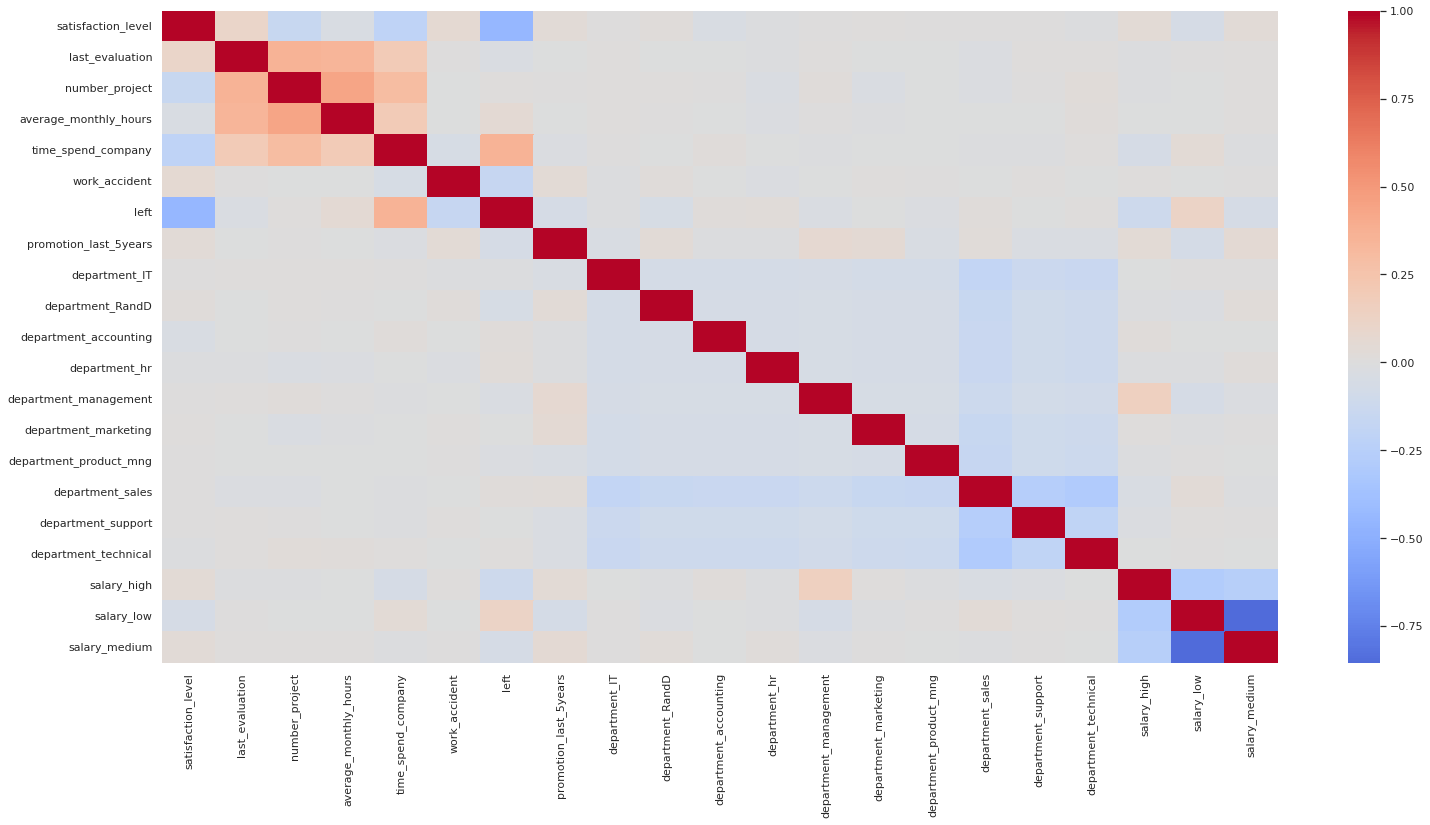

In [120]:
from scipy import stats

fig = df3.corr()

sns.heatmap(fig, cmap='coolwarm', center=0)

Whether an employee leaves is most highly correlated to their time spent at the company, whether they've had a work accident, and their salary.

### Modeling

In [139]:
## First going to check the ratio of employees that have left and not,
## to make sure their is a relatively equal balance

left_df = df3[df3['left'] == 1]
stayed_df = df3[df3['left'] == 0]
left = len(left_df)
stayed = len(stayed_df)
percent = left / (left + stayed)
print(left)
print(stayed)
print(percent * 100)

3362
10355
24.509732448786178


25% is very acceptable so we do not need to upsample or downsample

In [143]:
## Going to use an XGB Classifer to predict whether an employee is likely to leave

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

## First need to Identify X and y variables

y = df3['left']

X = df3.drop(columns=['left'], axis = 1)

## Splitting up data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [142]:
y_test

11393    1
4677     0
10001    0
13495    1
8169     0
        ..
10982    0
12152    0
12441    0
5592     0
10645    0
Name: left, Length: 2744, dtype: int64

In [125]:
## Instantiating Classifier

xgb = XGBClassifier(objective='binary:logistic', random_state=42)

In [126]:
## Instantiating a GridSearch with hyper parameters
## Refitting with f1 score

cv_params = {'max_depth': [4,8,12], 
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }   

scoring = {'accuracy', 'precision', 'recall', 'f1'}

xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [127]:
## Fitting model to training data

xgb_cv.fit(X_train,y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=42,
                                     reg_alpha=None, ...),
             iid='deprecate

### Evaluation

In [128]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 3,
 'n_estimators': 300}

In [129]:
xgb_cv.best_score_

0.9706812495308832

In [131]:
## Evaluating on test data now

y_pred = xgb_cv.predict(X_test)

In [134]:
def get_test_scores(model_name:str, preds, y_test_data):
    
    accuracy = round(accuracy_score(y_test_data, preds), 3)
    precision = round(precision_score(y_test_data, preds), 3)
    recall = round(recall_score(y_test_data, preds), 3)
    f1 = round(f1_score(y_test_data, preds), 3)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision], 
                        'recall': [recall],
                        'f1': [f1],
                        'accuracy': [accuracy]
                        })
  
    return table

In [135]:
get_test_scores('XGBClassifier', y_pred, y_test)

,model,precision,recall,f1,accuracy
0,XGBClassifier,0.986,0.967,0.977,0.989


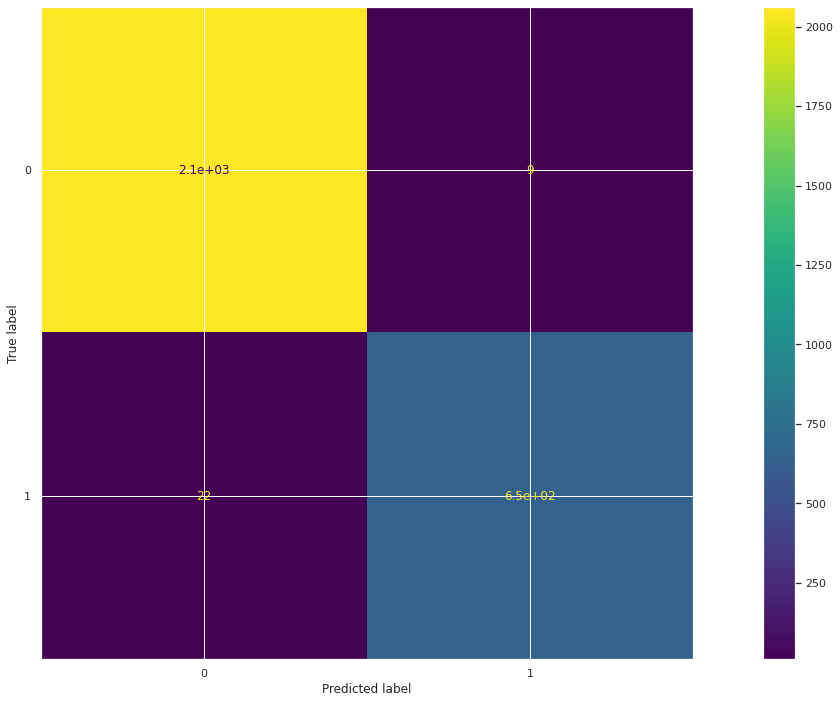

In [137]:
## Plotting confusion matrix to visualse model performance

cm = confusion_matrix(y_test, y_pred, labels=xgb_cv.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.classes_)
disp.plot();

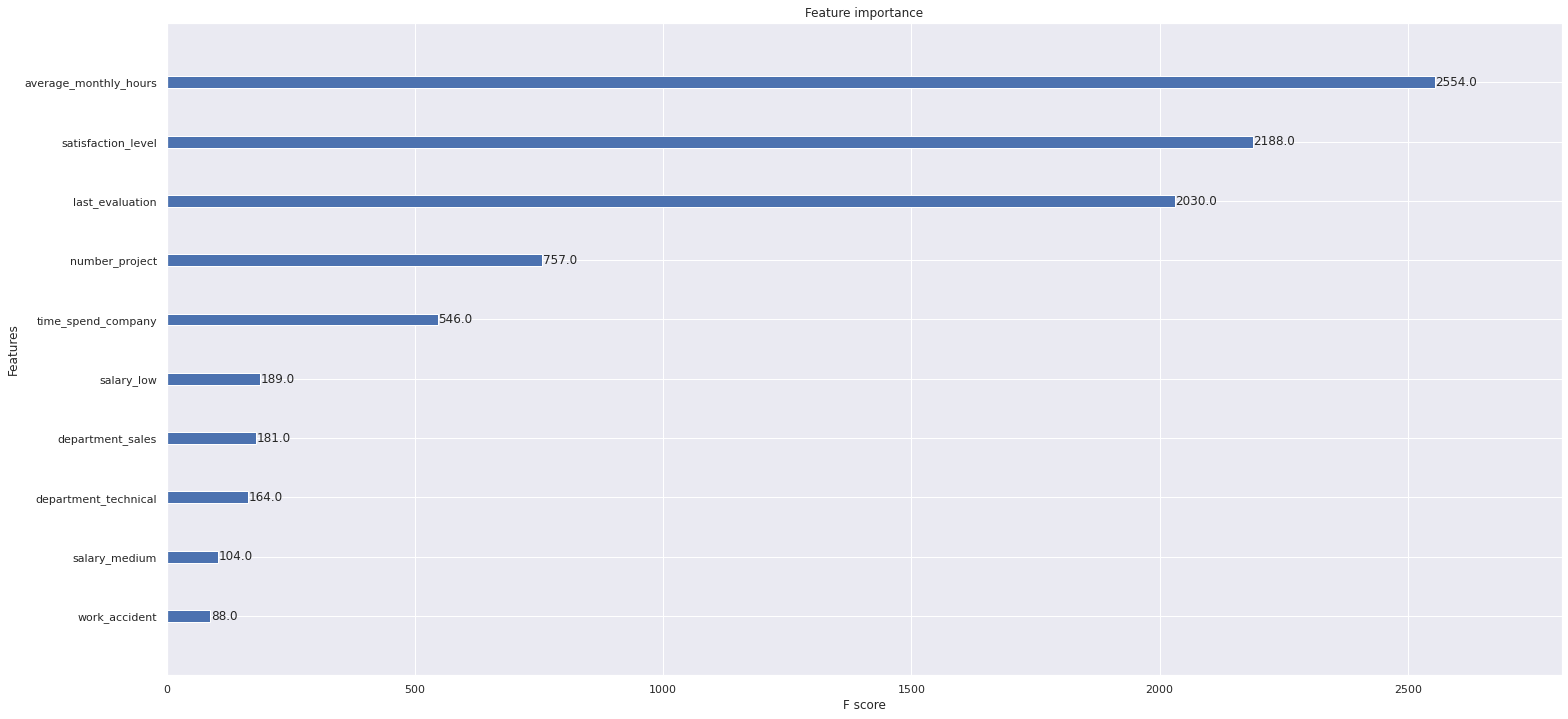

In [141]:
## Plotting relative importance of each variable used to determine whether 
## Employee is likely to leave or not

plot_importance(xgb_cv.best_estimator_, max_num_features=10);

Model summary: 2100 true negatives, 650 true positives, 22 false negatives, 9 false positives

Overall very strong model, would reccomend to use this model to predict whether future employees are likely to leave based on metrics given initially. From the feature importance graph, we can see that employees who worked longer hours are more likely to leave, can be interpretted as overworked. Employees with low satisfaction scores are also more likely to leave. And employees with low evaluation scores are likely to leave.